In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [40]:
data = pd.read_csv('82.csv')

In [41]:
X = data[['Raport']]

In [4]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

NameError: name 'KMeans' is not defined

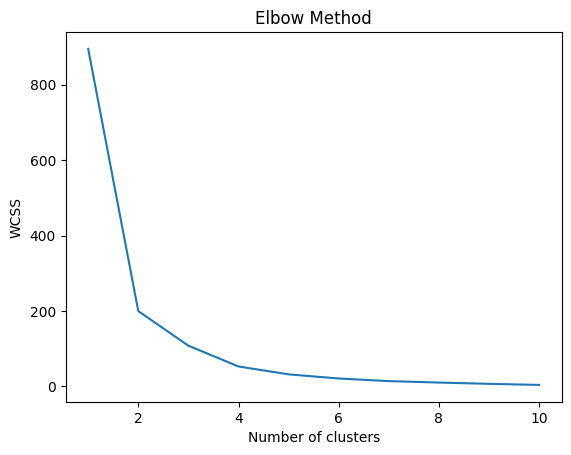

In [43]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [44]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
data['cluster'] = y_kmeans

In [46]:
cluster_means = data.groupby('cluster')['Raport'].mean().sort_values()

In [47]:
data['keterangan'] = cluster_labels = {
    cluster_means.index[0]: 'Kurang Memahami', 
    cluster_means.index[1]: 'Baik', 
    cluster_means.index[2]: 'Cukup Faham', 
    cluster_means.index[3]: 'Sangat Memahami'
}

In [48]:
data['keterangan'] = data['cluster'].map(cluster_labels)

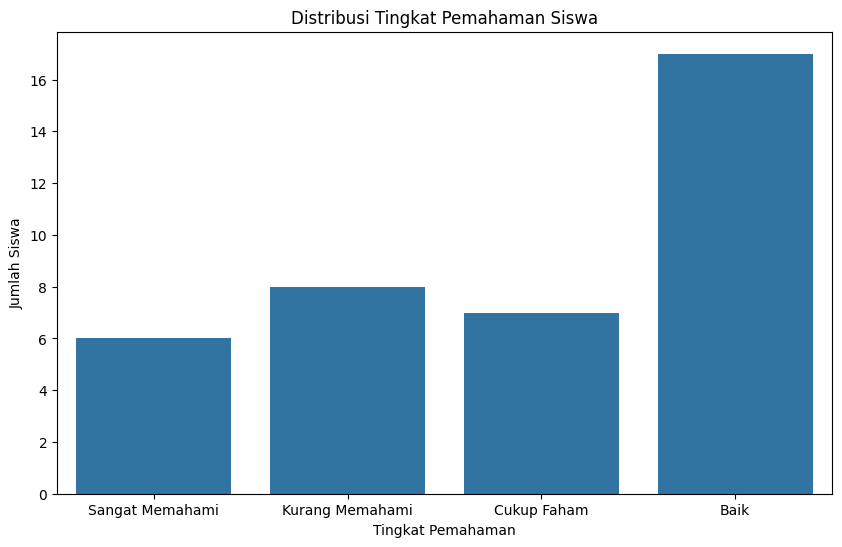

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='keterangan', data=data)
plt.title('Distribusi Tingkat Pemahaman Siswa')
plt.xlabel('Tingkat Pemahaman')
plt.ylabel('Jumlah Siswa')
plt.show()